# Exp 2-2 Selecting & Counting

We're going to use a new dataset here. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9).

The NYC311 Call Center opened in March 2003, providing 24/7 help with more than 3,600 non-emergency government services

# Setup

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading data

In [2]:
complaints = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

/Users/chris/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Depending on your pandas version, you might see an error like "DtypeWarning: Columns (48,49) have mixed types". This means that it's encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are integers.

For now we're going to ignore it and hope we don't run into a problem, but in the long run we'd need to investigate this warning.

# What's even in it? (peek the head)

When you `head` a large dataframe, it will only show you the first few rows.

In [3]:
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


You can peek the tail as well.

In [4]:
complaints.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"
364557,29611816,01/01/2015 12:00:50 AM,01/01/2015 02:47:50 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11420.0,123-19 135 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.674212,-73.803585,"(40.674211762243935, -73.80358548685278)"


# Selecting columns and rows

To select a column, we index with the name of the column, like this:

In [5]:
complaints['Complaint Type']

0          Noise - Street/Sidewalk
1                 Blocked Driveway
2                 Blocked Driveway
3                  Illegal Parking
4                  Illegal Parking
5                  Illegal Parking
6                  Illegal Parking
7                 Blocked Driveway
8                  Illegal Parking
9                 Blocked Driveway
10                Blocked Driveway
11                Blocked Driveway
12         Noise - Street/Sidewalk
13                 Illegal Parking
14                Derelict Vehicle
15                Blocked Driveway
16                Blocked Driveway
17              Noise - Commercial
18              Noise - Commercial
19         Noise - Street/Sidewalk
20                 Illegal Parking
21                 Illegal Parking
22              Noise - Commercial
23                 Illegal Parking
24                Blocked Driveway
25                Blocked Driveway
26        Noise - House of Worship
27                Blocked Driveway
28                 I

To get the first 5 rows of a dataframe, we can use a slice: `df[:5]`.

This is a great way to get a sense for what kind of information is in the dataframe -- take a minute to look at the contents and get a feel for this dataset.

In [6]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


We can combine these to get the first 5 rows of a column:

In [7]:
complaints['Complaint Type'][:5]

0    Noise - Street/Sidewalk
1           Blocked Driveway
2           Blocked Driveway
3            Illegal Parking
4            Illegal Parking
Name: Complaint Type, dtype: object

and it doesn't matter which direction we do it in:

In [12]:
complaints[:5]['Complaint Type']

0    Noise - Street/Sidewalk
1           Blocked Driveway
2           Blocked Driveway
3            Illegal Parking
4            Illegal Parking
Name: Complaint Type, dtype: object

# Selecting multiple columns

What if we just want to know the complaint type and the borough, but not the rest of the information? Pandas makes it really easy to select a subset of the columns: just index with list of columns you want.

In [13]:
complaints[['Complaint Type', 'Borough']]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,MANHATTAN
1,Blocked Driveway,QUEENS
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,QUEENS
5,Illegal Parking,BROOKLYN
6,Illegal Parking,MANHATTAN
7,Blocked Driveway,BRONX
8,Illegal Parking,QUEENS
9,Blocked Driveway,BROOKLYN


That showed us a summary, and then we can look at the first 10 rows:

In [14]:
complaints[['Complaint Type', 'Borough']][:10]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,MANHATTAN
1,Blocked Driveway,QUEENS
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,QUEENS
5,Illegal Parking,BROOKLYN
6,Illegal Parking,MANHATTAN
7,Blocked Driveway,BRONX
8,Illegal Parking,QUEENS
9,Blocked Driveway,BROOKLYN


# What's the most common complaint type?

This is a really easy question to answer! There's a `.value_counts()` method that we can use:

In [15]:
complaints['Complaint Type'].value_counts()

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint Type, dtype: int64

If we just wanted the top 10 most common complaints, we can do this:

In [16]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts[:10]

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Complaint Type, dtype: int64

But it gets better! We can plot them!

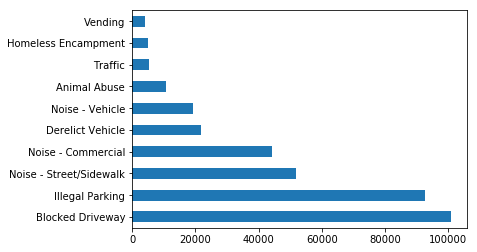

In [17]:
complaint_counts[:10].plot(kind='barh')

# Question

* What is the most common complaint type?
Blocked Driveway 

# Which borough has the most noise complaints

Next, we'd like to know which borough has the most noise complaints.

To get the noise complaints, we need to find the rows where the "Complaint Type" column is "Noise - Street/Sidewalk". I'll show you how to do that, and then explain what's going on.

In [18]:
noise_complaints = complaints[complaints['Complaint Type'] == "Noise - Street/Sidewalk"]
noise_complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
12,32306612,12/31/2015 11:48:03 PM,01/01/2016 02:17:59 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10461.0,1701 PILGRIM AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.845545,-73.833585,"(40.845545043640215, -73.83358471831198)"
19,32308195,12/31/2015 11:40:55 PM,01/01/2016 12:28:31 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10026.0,264 WEST 118 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.805267,-73.953353,"(40.80526715877265, -73.9533526205901)"
38,32308014,12/31/2015 11:11:33 PM,12/31/2015 11:41:01 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11211.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.714007,-73.941715,"(40.714007352909874, -73.94171469793936)"
54,32308825,12/31/2015 10:58:16 PM,01/01/2016 12:28:31 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10026.0,125 WEST 112 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.800022,-73.952858,"(40.800021785765296, -73.95285785808254)"


If you look at `noise_complaints`, you'll see that this worked, and it only contains complaints with the right complaint type. But how does this work? Let's deconstruct it into two pieces

In [19]:
complaints['Complaint Type'] == "Noise - Street/Sidewalk"

0          True
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12         True
13        False
14        False
15        False
16        False
17        False
18        False
19         True
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
364528    False
364529     True
364530    False
364531    False
364532    False
364533    False
364534    False
364535    False
364536    False
364537    False
364538    False
364539    False
364540    False
364541    False
364542     True
364543     True
364544    False
364545    False
364546    False
364547     True
364548    False
364549    False
364550    False
364551     True
364552     True
364553    False
364554    False
364555     True
364556    False
364557    False
Name: Complaint Type, Le

This is a big array of `True`s and `False`s, one for each row in our dataframe. When we index our dataframe with this array, we get just the rows where our boolean array evaluated to `True`.  It's important to note that for row filtering by a boolean array the length of our dataframe's index must be the same length as the boolean array used for filtering.

You can also combine more than one condition with the `&` operator like this:

In [21]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
in_brooklyn = complaints['Borough'] == "BROOKLYN"

complaints[is_noise & in_brooklyn].head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
38,32308014,12/31/2015 11:11:33 PM,12/31/2015 11:41:01 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11211.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.714007,-73.941715,"(40.714007352909874, -73.94171469793936)"
71,32305303,12/31/2015 10:46:24 PM,12/31/2015 11:08:46 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11216.0,95 HALSEY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.681870,-73.949372,"(40.68186974794423, -73.94937196628798)"
77,32306025,12/31/2015 10:44:23 PM,12/31/2015 11:05:23 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11216.0,95 HALSEY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.681870,-73.949372,"(40.68186974794423, -73.94937196628798)"
120,32309640,12/31/2015 10:03:00 PM,12/31/2015 10:26:42 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11208.0,165 HIGHLAND PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.681312,-73.881147,"(40.681311719589715, -73.88114658988798)"
173,32305285,12/31/2015 08:25:07 PM,12/31/2015 09:14:27 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11211.0,230 SOUTH 2 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.711989,-73.958601,"(40.71198902962906, -73.95860130388259)"


Or if we just wanted a few columns:

In [22]:
complaints[is_noise & in_brooklyn][['Complaint Type', 'Borough', 'Created Date', 'Descriptor']].head(n=10)

,Complaint Type,Borough,Created Date,Descriptor
38,Noise - Street/Sidewalk,BROOKLYN,12/31/2015 11:11:33 PM,Loud Music/Party
71,Noise - Street/Sidewalk,BROOKLYN,12/31/2015 10:46:24 PM,Loud Music/Party
77,Noise - Street/Sidewalk,BROOKLYN,12/31/2015 10:44:23 PM,Loud Music/Party
120,Noise - Street/Sidewalk,BROOKLYN,12/31/2015 10:03:00 PM,Loud Talking
173,Noise - Street/Sidewalk,BROOKLYN,12/31/2015 08:25:07 PM,Loud Music/Party
245,Noise - Street/Sidewalk,BROOKLYN,12/31/2015 06:38:59 PM,Loud Music/Party
317,Noise - Street/Sidewalk,BROOKLYN,12/31/2015 04:45:04 PM,Loud Talking
394,Noise - Street/Sidewalk,BROOKLYN,12/31/2015 02:46:12 PM,Loud Talking
414,Noise - Street/Sidewalk,BROOKLYN,12/31/2015 02:17:44 PM,Loud Music/Party
419,Noise - Street/Sidewalk,BROOKLYN,12/31/2015 02:14:56 PM,Loud Music/Party


# A digression about numpy arrays

On the inside, the type of a column is `pd.Series`

In [23]:
pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

and pandas Series are internally numpy arrays. If you add `.values` to the end of any `Series`, you'll get its internal numpy array

In [24]:
pd.Series([1,2,3]).values

array([1, 2, 3])

So this binary-array-selection business is actually something that works with any numpy array:

In [25]:
arr = np.array([1,2,3])
arr != 2

array([ True, False,  True], dtype=bool)

In [26]:
arr[arr != 2]

array([1, 3])

# So, which borough has the most noise complaints?

In [27]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
noise_complaints = complaints[is_noise]
noise_complaints['Borough'].value_counts()

MANHATTAN        22380
BROOKLYN         13983
BRONX             9144
QUEENS            4681
STATEN ISLAND      889
Unspecified        615
Name: Borough, dtype: int64

It's Manhattan! But what if we wanted to divide by the total number of complaints, to make it make a bit more sense? That would be easy too:

In [28]:
noise_complaint_counts = noise_complaints['Borough'].value_counts()
complaint_counts = complaints['Borough'].value_counts()
noise_complaint_counts / complaint_counts

BRONX            0.185971
BROOKLYN         0.117639
MANHATTAN        0.288916
QUEENS           0.046454
STATEN ISLAND    0.057957
Unspecified      0.207911
Name: Borough, dtype: float64

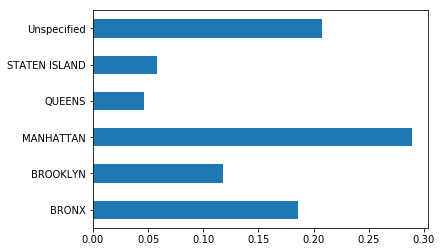

In [29]:
(noise_complaint_counts / complaint_counts).plot(kind='barh')

In [42]:
is_illegal = complaints['Complaint Type'] == "Illegal Parking"
illegal_complaints = complaints[is_illegal]
illegal_complaints['Borough'].value_counts()


BROOKLYN         33533
QUEENS           27209
MANHATTAN        14561
BRONX             9888
STATEN ISLAND     6223
Unspecified       1265
Name: Borough, dtype: int64

In [43]:
illegal_complaint_counts = illegal_complaints['Borough'].value_counts()
complaint_counts = complaints['Borough'].value_counts()
illegal_complaint_counts / complaint_counts
#pvt = complaints.pivot_table(index="Borough", columns="Complaint Type", values=)
#pvt

BROOKLYN         0.282112
QUEENS           0.270022
MANHATTAN        0.187976
BRONX            0.201102
STATEN ISLAND    0.405698
Unspecified      0.427654
Name: Borough, dtype: float64

In [50]:
complaints_queens=complaints['Borough']=='QUEENS'
Queens_complaints = complaints[complaints_queens]
Queens_complaints['Complaint Type'].value_counts()

Blocked Driveway             41486
Illegal Parking              27209
Derelict Vehicle              9919
Noise - Commercial            7406
Noise - Street/Sidewalk       4681
Noise - Vehicle               3053
Animal Abuse                  2640
Traffic                       1510
Noise - Park                   649
Homeless Encampment            517
Vending                        513
Drinking                       395
Noise - House of Worship       349
Urinating in Public            149
Disorderly Youth                64
Bike/Roller/Skate Chronic       63
Graffiti                        51
Illegal Fireworks               38
Posting Advertisement           38
Panhandling                     36
Name: Complaint Type, dtype: int64

In [51]:
Queens_complaint_counts = Queens_complaints['Complaint Type'].value_counts()
complaint_counts = complaints['Complaint Type'].value_counts()
Queens_complaint_counts / complaint_counts

Agency Issues                     NaN
Animal Abuse                 0.250451
Animal in a Park                  NaN
Bike/Roller/Skate Chronic    0.131799
Blocked Driveway             0.411237
Derelict Vehicle             0.457920
Disorderly Youth             0.203175
Drinking                     0.280341
Ferry Complaint                   NaN
Graffiti                     0.324841
Homeless Encampment          0.105964
Illegal Fireworks            0.220930
Illegal Parking              0.293583
Noise - Commercial           0.167902
Noise - House of Worship     0.326168
Noise - Park                 0.157946
Noise - Street/Sidewalk      0.090556
Noise - Vehicle              0.157761
Panhandling                  0.110092
Posting Advertisement        0.055800
Squeegee                          NaN
Traffic                      0.290496
Urinating in Public          0.232449
Vending                      0.122376
Name: Complaint Type, dtype: float64

# Question

* Which borough has the most "Illegal Parking" complaints?BROOKLYN
* What is the most complaint type in Queens?Blocked Driveway

Hint: Use pivot table to save you time